Notebook created by Mohamed BERRIMI [Twitter](https://twitter.com/MouhamedBerrimi)

In [ ]:
print('hello')

hello


#Importing the dataset 

In [ ]:
! git clone https://github.com/mohamedScikitLearn/OCT_Balanced_Version.git

Cloning into 'OCT_Balanced_Version'...
remote: Enumerating objects: 29491, done.
remote: Total 29491 (delta 0), reused 0 (delta 0), pack-reused 29491
Receiving objects: 100% (29491/29491), 1.87 GiB | 20.88 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Checking out files: 100% (32065/32065), done.


# Dataset 
## OCT dataset : Optical Coherence Tomography (30K scans version)

![alt text](https://i.ytimg.com/vi/BxRAAVr7oA8/maxresdefault.jpg)


The dataset contains 30k OCT scans of the retina, the scans belongs to one of the following categories: 
*   CNV: Choroidal neovascularization
*   DRUSEN : first signs of Age Macular Degeneration
*   DME : Diabetic Macular Ederma
*   NORMAL : Healthy scans

[Kaggle link](https://www.kaggle.com/mohamedberrimi/oct-images-balanced-version)


[Full Dataset on Kaggle](https://www.kaggle.com/paultimothymooney/kermany2018)

 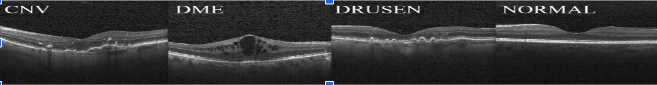

**See categories**

In [ ]:
# Check the folders 
! ls OCT_Balanced_Version

CNV  DME  DRUSEN  NORMAL


**Import the modules **

In [ ]:

import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
import tensorflow 
import keras
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D,AveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model



## TensorFlow

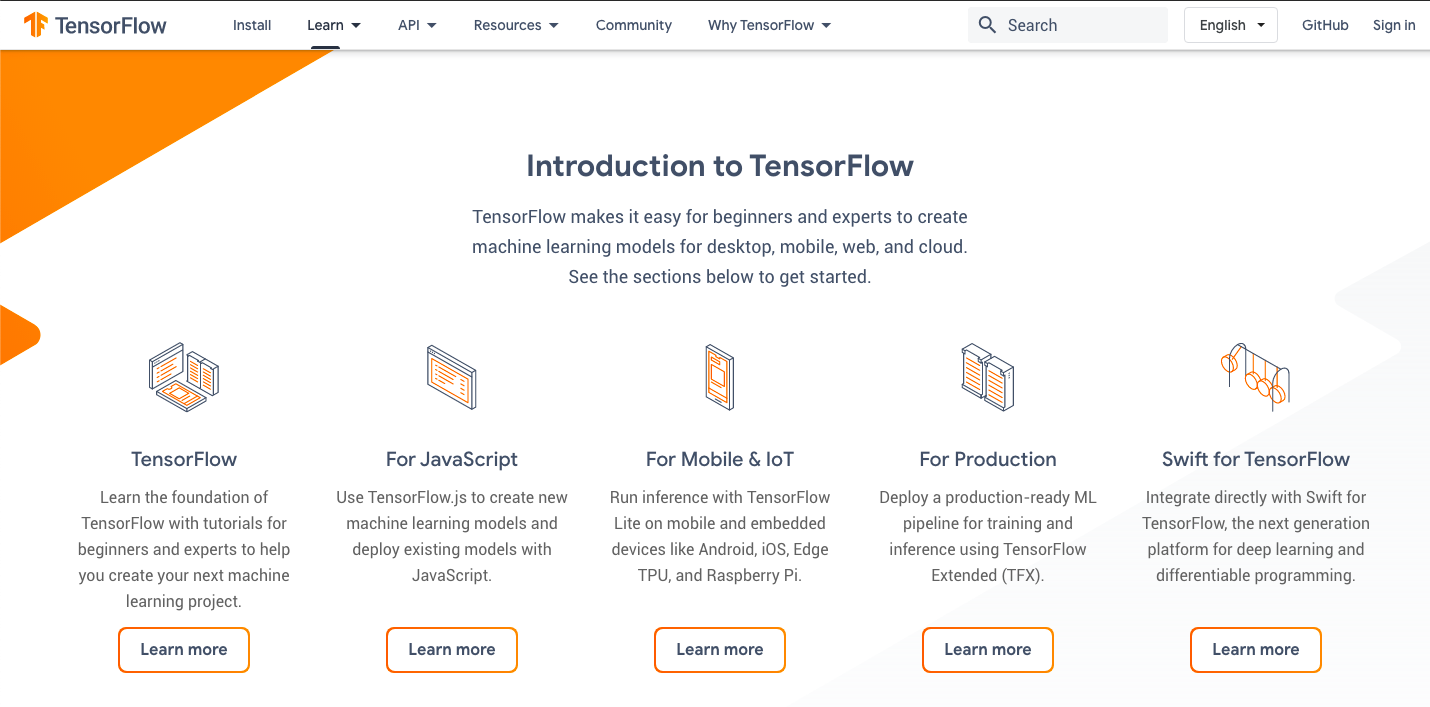

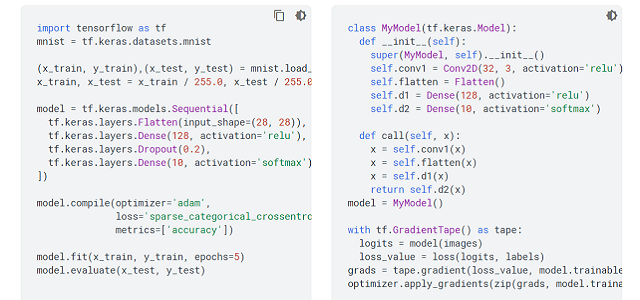

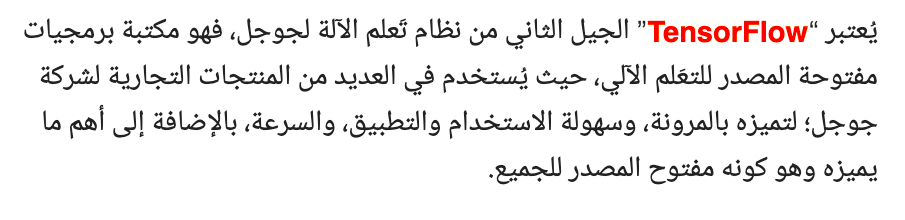

# Import the images using Datagenerator class from Keras 

# Data Augmentation: 
Deep learning models requires the use of large datasets, for this reason, we are going to use Data augmentation technique to **augment**  our dataset, by generating similar scans to the original ones. 


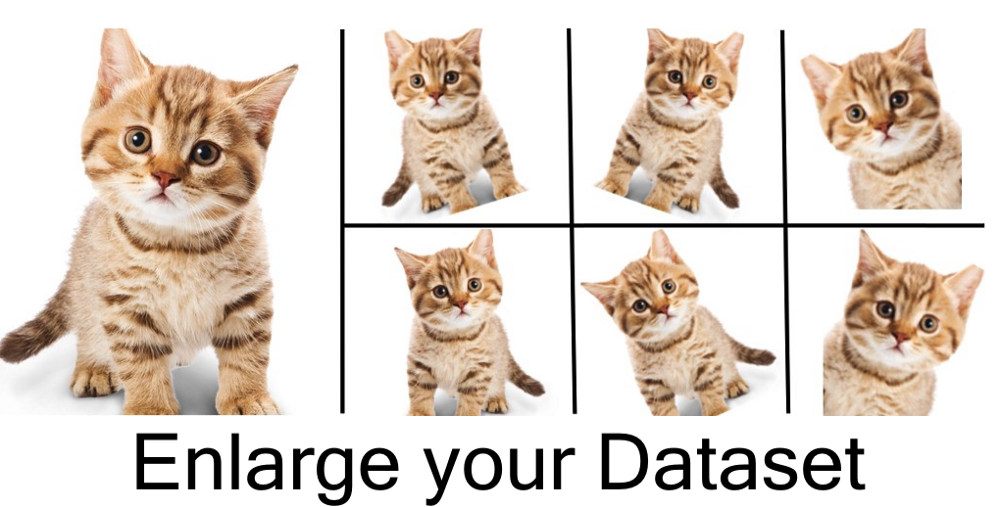

In [ ]:
 
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,zoom_range=0.2,horizontal_flip=True,
      
        validation_split=0.2)

 
training_set = train_datagen.flow_from_directory('OCT_Balanced_Version',
  target_size = (224, 224),
  batch_size = 80,
   color_mode="grayscale",
  classes=["DME","CNV","NORMAL","DRUSEN"],
  subset='training')
 
validation_set = train_datagen.flow_from_directory('OCT_Balanced_Version',
  target_size = (224, 224),
  batch_size = 80,
  
  color_mode="grayscale",
  subset='validation',
  classes=["DME","CNV","NORMAL","DRUSEN"])

 

Found 25652 images belonging to 4 classes.
Found 6412 images belonging to 4 classes.


**Create the train and test set**

In [ ]:
x_test,ytest=next(validation_set)
x_train, y_train = next(training_set)


# Create the CNN architecture

In [ ]:
classifier = Sequential()


**The model is to be Sequential: allow us to create models layer-by-layer**

In [ ]:
classifier.add(Conv2D(84, (3, 3), input_shape = (224, 224, 1), activation = 'relu'))
#classifier.add(Conv2D(Number of filters , (size of filter), input_shape = (224, 224, 1), activation = 'relu'))


## Convolution Layer: ![Conv layer example](https://stanford.edu/~shervine/teaching/cs-230/illustrations/convolution-layer-a.png?1c517e00cb8d709baf32fc3d39ebae67)

![alt text](http://www.ashokrahulgade.com/skills/DL/CNN/2.gif)

In [ ]:
classifier.add(MaxPooling2D(pool_size = (4, 4)))


![Pooling](https://upload.wikimedia.org/wikipedia/commons/d/dc/RoI_pooling_animated.gif)

![alt text](https://www.oreilly.com/radar/wp-content/uploads/sites/3/2019/06/Figure_4-87c227113cdd0b73d842267404d4aa00.gif)

In [ ]:
classifier.add(Flatten())
classifier.add(Dense(units = 258, activation = 'relu'))

classifier.add(Dense(units = 4, activation = 'softmax')) # Output layer


![alt text](https://www.researchgate.net/profile/Budiman_Minasny/publication/334783857/figure/fig4/AS:786596169269249@1564550549811/Illustration-of-flatten-layer-that-is-connecting-the-pooling-layers-to-the-fully.png)

In [ ]:
classifier = Sequential() # The model is going to be Sequential: allow us to create models layer-by-layer

classifier.add(Conv2D(84, (3, 3), input_shape = (224, 224, 1), activation = 'relu')) # do not change this
classifier.add(MaxPooling2D(pool_size = (4, 4)))
classifier.add(Conv2D(512, (3, 3), activation = 'relu'))
classifier.add(Conv2D(512, (3, 3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (3, 3)))
classifier.add(Conv2D(72, (3, 3), activation = 'relu'))

classifier.add(Flatten())
classifier.add(Dense(units = 258, activation = 'relu'))

classifier.add(Dense(units = 4, activation = 'sigmoid')) # Do not change this 
classifier.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 84)      840       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 55, 55, 84)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 53, 53, 512)       387584    
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 51, 51, 512)       2359808   
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 512)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 72)        331848    
_________________________________________________________________
flatten_6 (Flatten)          (None, 16200)            

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)

classifier.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history=classifier.fit_generator(
    
    
    training_set, # used for training and biggest portion
                            
                            steps_per_epoch = 28860/80,
                            validation_data = validation_set, 
                           
                            validation_steps= 3204/80,
                            
                            epochs = 15,
                            shuffle=True, 
                            callbacks = callbacks_list+[MetricsCheckpoint('logs')])

                        

Epoch 1/15
361/360 [==============================] - 178s 494ms/step - loss: 0.7284 - accuracy: 0.7114 - val_loss: 0.5910 - val_accuracy: 0.7375
Epoch 2/15
361/360 [==============================] - 178s 494ms/step - loss: 0.3994 - accuracy: 0.8514 - val_loss: 0.4206 - val_accuracy: 0.8125
Epoch 3/15
361/360 [==============================] - 178s 494ms/step - loss: 0.3144 - accuracy: 0.8858 - val_loss: 0.3815 - val_accuracy: 0.8250
Epoch 4/15
361/360 [==============================] - 178s 492ms/step - loss: 0.2664 - accuracy: 0.9049 - val_loss: 0.4268 - val_accuracy: 0.8250
Epoch 5/15
361/360 [==============================] - 178s 492ms/step - loss: 0.2439 - accuracy: 0.9125 - val_loss: 0.4890 - val_accuracy: 0.7625
Epoch 6/15
361/360 [==============================] - 176s 489ms/step - loss: 0.2216 - accuracy: 0.9214 - val_loss: 0.4125 - val_accuracy: 0.8625
Epoch 7/15
361/360 [==============================] - 177s 491ms/step - loss: 0.2051 - accuracy: 0.9265 - val_loss: 0.3775 -

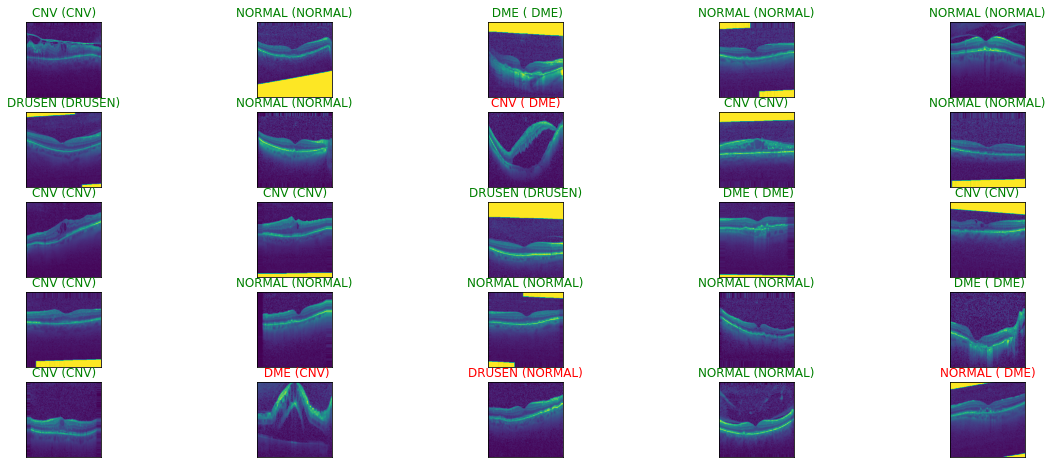

In [ ]:
labelsFaces =['CNV',' DME' , 'DRUSEN' , 'NORMAL']


predictedExpression = classifier.predict(x_test)

figure = plt.figure(figsize=(20, 8))

for i, index in enumerate(np.random.choice(x_test.shape[0], size=25, replace=False)):
    ax = figure.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(predictedExpression[index])
    true_index = np.argmax(ytest[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labelsFaces[predict_index], 
                                  labelsFaces[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()



## Earlystopping

In [ ]:
model.save('model.h5')